In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler, LabelEncoder
import joblib

In [2]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
heart_disease = fetch_ucirepo(id=45)

# data (as pandas dataframes)
X = heart_disease.data.features
y = heart_disease.data.targets

# metadata
print(heart_disease.metadata)

# variable information
print(heart_disease.variables)


{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'ID': 231, 'type': 'NATIVE', 'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M

In [3]:
df = pd.DataFrame(X)
df['num'] = y
df.to_csv('../data/data.csv',index=False)

In [4]:
df = pd.read_csv('../data/data.csv')

In [5]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

In [6]:
# Display the shape and first few rows
print(f"Dataset Shape: {df.shape}")
print(df.head())

Dataset Shape: (303, 14)
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   1       145   233    1        2      150      0      2.3      3   
1   67    1   4       160   286    0        2      108      1      1.5      2   
2   67    1   4       120   229    0        2      129      1      2.6      2   
3   37    1   3       130   250    0        0      187      0      3.5      3   
4   41    0   2       130   204    0        2      172      0      1.4      1   

    ca  thal  num  
0  0.0   6.0    0  
1  3.0   3.0    2  
2  2.0   7.0    1  
3  0.0   3.0    0  
4  0.0   3.0    0  


In [7]:
# Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())


Missing values in each column:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64


In [8]:
# Check data types
print("\nData types of each column:")
print(df.dtypes)


Data types of each column:
age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca          float64
thal        float64
num           int64
dtype: object


In [9]:
# Basic statistics
print("\nBasic Statistics:")
print(df.describe())


Basic Statistics:
              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.438944    0.679868    3.158416  131.689769  246.693069    0.148515   
std      9.038662    0.467299    0.960126   17.599748   51.776918    0.356198   
min     29.000000    0.000000    1.000000   94.000000  126.000000    0.000000   
25%     48.000000    0.000000    3.000000  120.000000  211.000000    0.000000   
50%     56.000000    1.000000    3.000000  130.000000  241.000000    0.000000   
75%     61.000000    1.000000    4.000000  140.000000  275.000000    0.000000   
max     77.000000    1.000000    4.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  299.000000   
mean     0.990099  149.607261    0.326733    1.039604    1.600660    0.672241   
std     

# Numerical features

In [10]:
numerical_cols = df.select_dtypes(include=["float64", "int64"]).columns.tolist()

# Handeling missing data


In [11]:
df[numerical_cols] = df[numerical_cols].apply(lambda col: col.fillna(col.mean()))

In [12]:
# Save the cleaned dataset
df.to_csv("../data/clean_data_before_std.csv", index=False)

print("✅ Cleaned dataset saved to '../data/clean_data_before_std.csv'")


✅ Cleaned dataset saved to '../data/clean_data_before_std.csv'


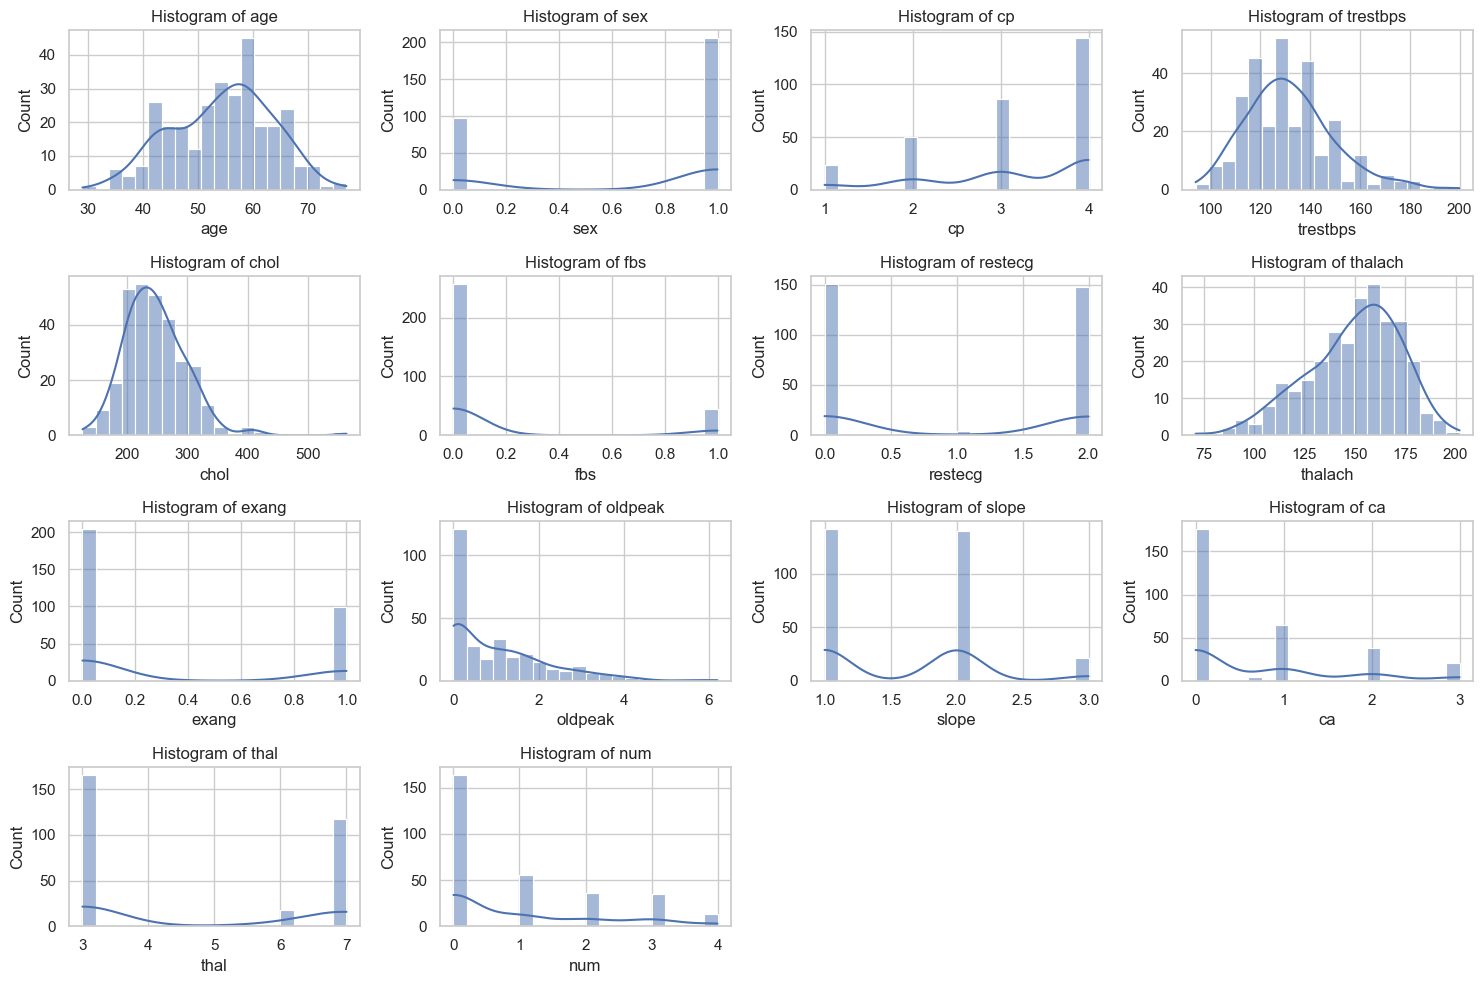

In [13]:
sns.set(style="whitegrid")

plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_cols):
    plt.subplot(4, 4, i + 1)
    sns.histplot(df[feature], bins=20, kde=True)
    plt.title(f'Histogram of {feature}')
plt.tight_layout()
plt.show()

In [14]:
numerical_cols

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal',
 'num']

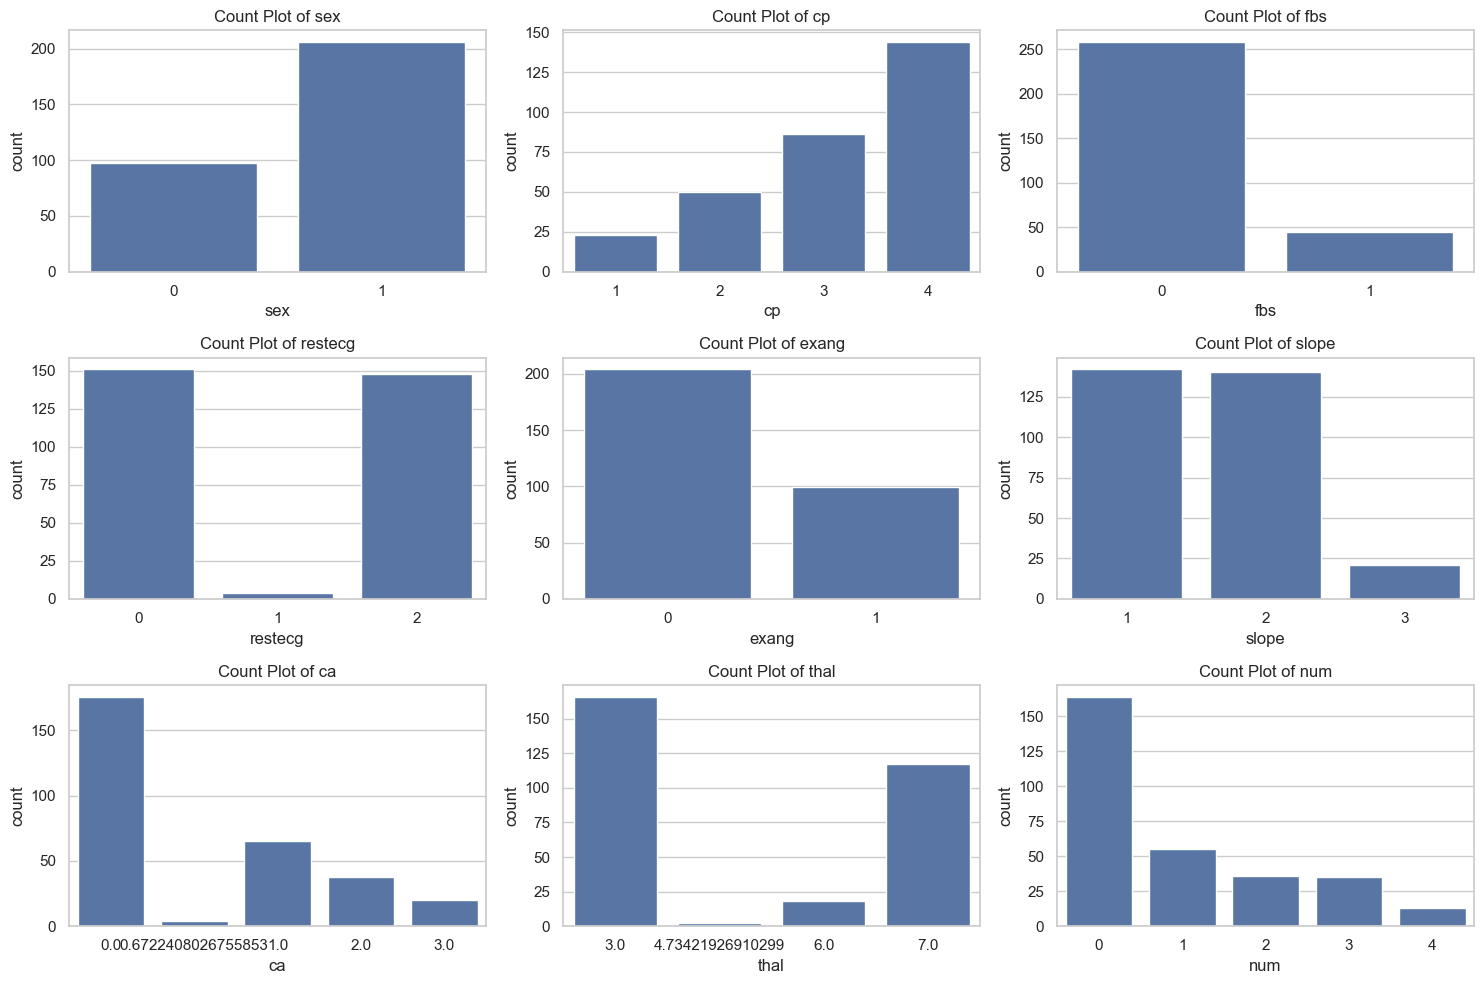

In [15]:
selected =['sex', 'cp','fbs', 'restecg', 'exang','slope','ca','thal', 'num']
plt.figure(figsize=(15, 10))
for i, feature in enumerate(selected):
    plt.subplot(3, 3, i + 1)
    sns.countplot(x=feature, data=df)
    plt.title(f'Count Plot of {feature}')
plt.tight_layout()
plt.show()

In [16]:
df['num'].value_counts()


num
0    164
1     55
2     36
3     35
4     13
Name: count, dtype: int64

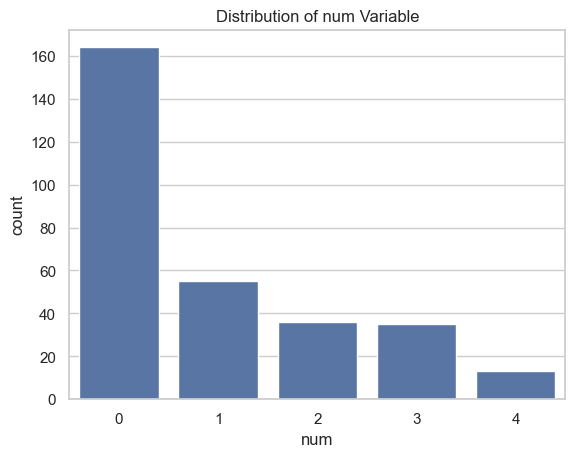

In [17]:
# to see it more clear
sns.countplot(x='num', data=df)
plt.title('Distribution of num Variable')
plt.show()

# 'num' Column values meaning:
## Value	Meaning
### 0	No heart disease
### 1	Mild heart disease
### 2	Moderate heart disease
### 3	Serious heart disease
### 4	Very serious heart disease


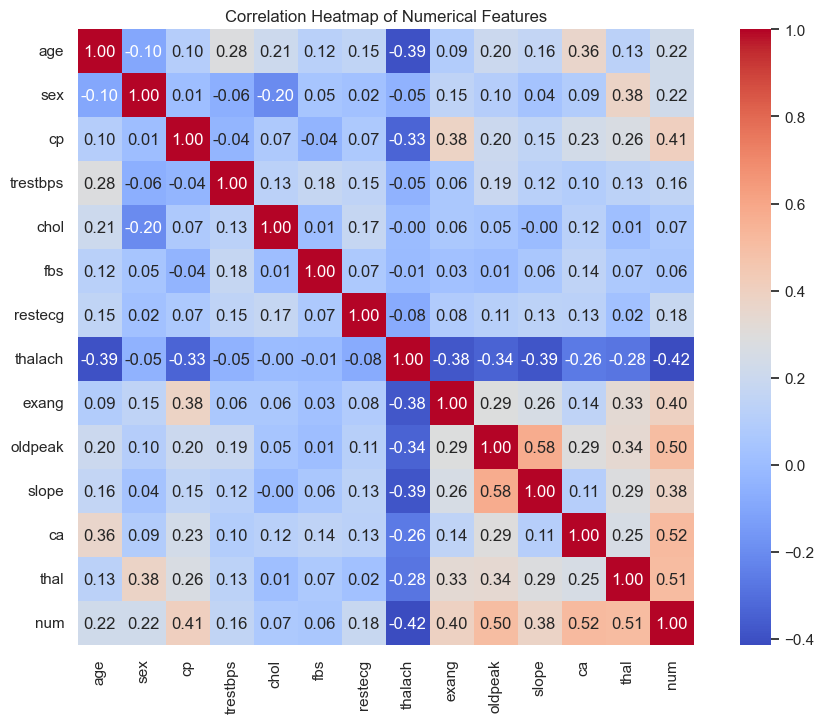

In [18]:
plt.figure(figsize=(12, 8))
correlation = df[numerical_cols].corr()
sns.heatmap(correlation, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

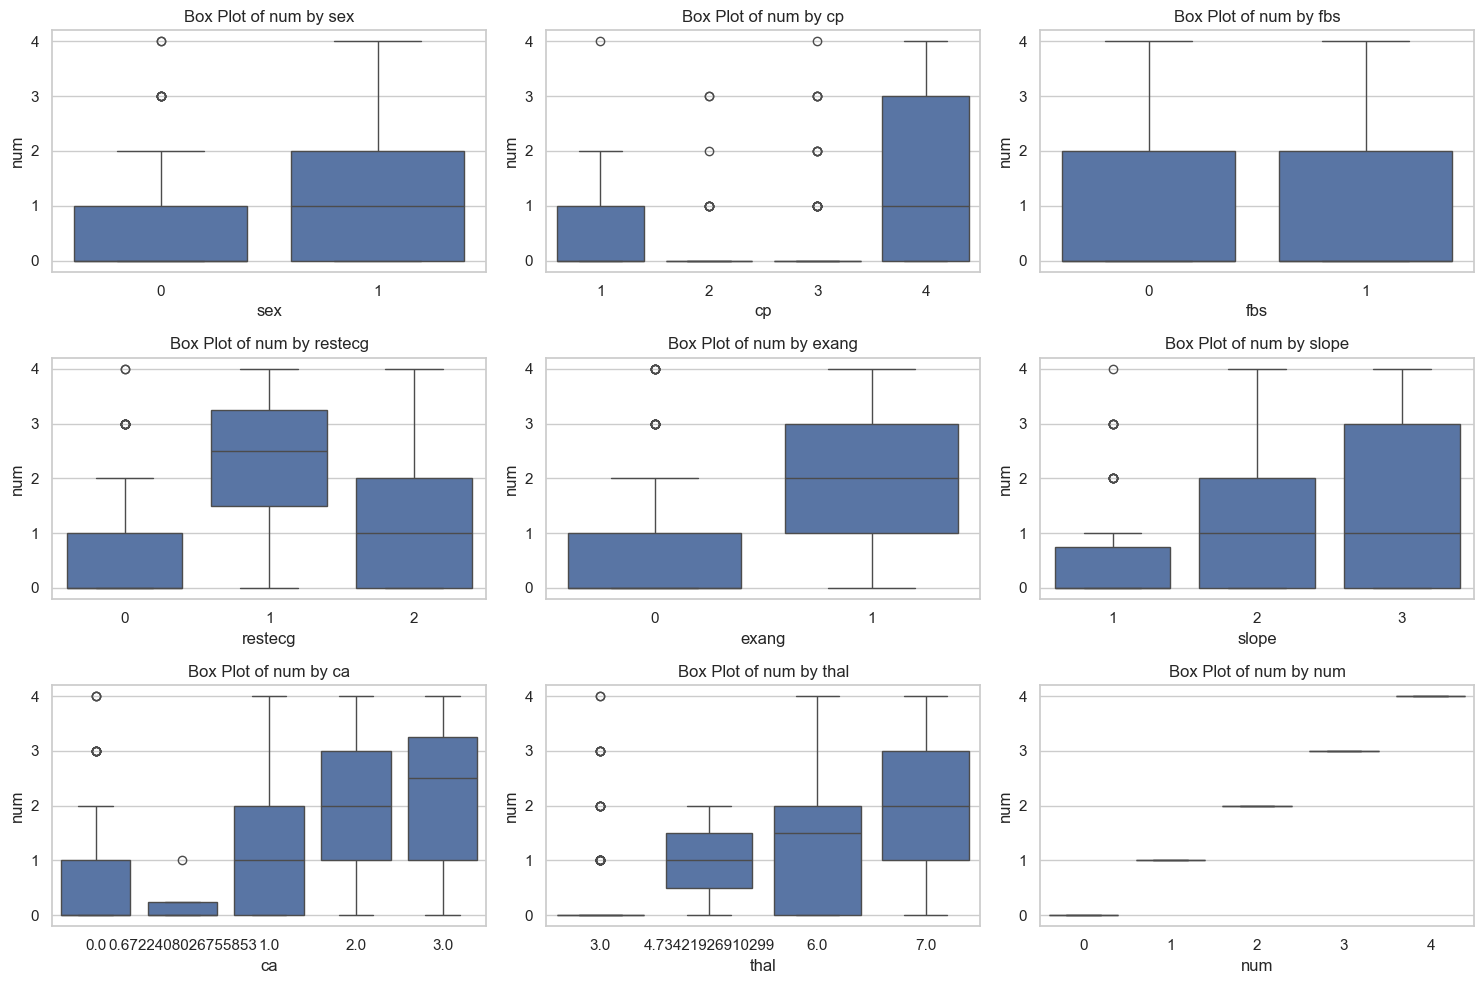

In [19]:
plt.figure(figsize=(15, 10))
for i, feature in enumerate(selected):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x=feature, y='num', data=df)
    plt.title(f'Box Plot of num by {feature}')
plt.tight_layout()
plt.show()

# Standardize numerical features

In [20]:
selected_to_scale = list(set(numerical_cols) - set(selected))

In [21]:

selected_to_scale = ['cp','thalach','thal','ca','oldpeak','age']

In [22]:
scaler = StandardScaler()
df[selected_to_scale] = scaler.fit_transform(df[selected_to_scale])

In [23]:
joblib.dump(scaler, '../models/scaler.pkl')

['../models/scaler.pkl']

# EDA:

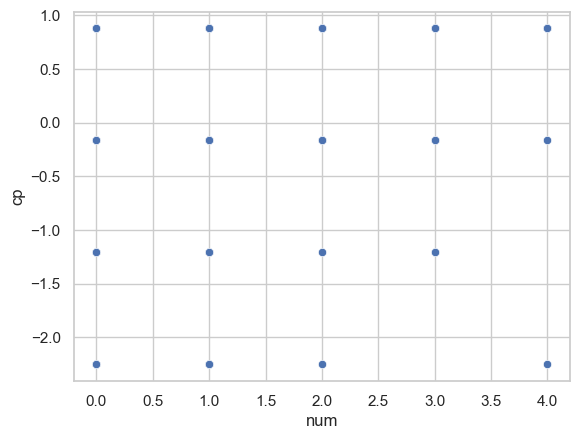

In [24]:
sns.scatterplot(data=df, x='num', y='cp')
plt.show()

# Convert target to binary (0 = no disease, 1 = disease)

In [25]:
df["num"] = df["num"].apply(lambda x: 1 if x > 0 else 0)

In [26]:
df['num'].value_counts()

num
0    164
1    139
Name: count, dtype: int64

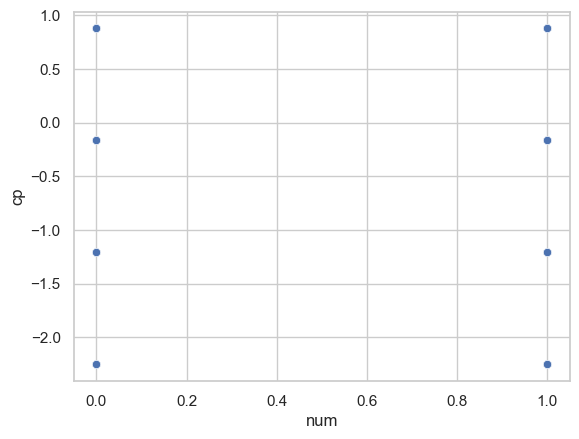

In [27]:
sns.scatterplot(data=df, x='num', y='cp')
plt.show()

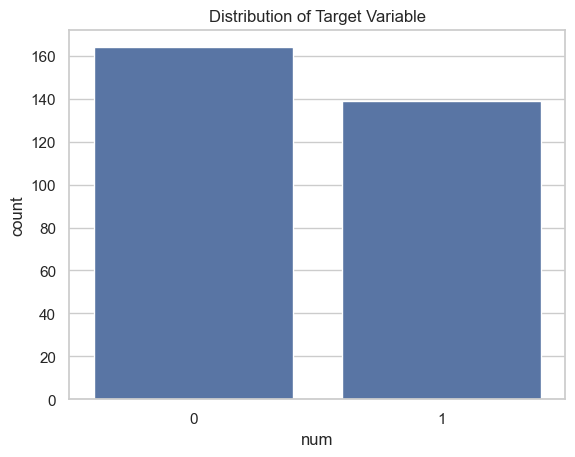

In [28]:
# Distribution of target variable
sns.countplot(x='num', data=df)
plt.title('Distribution of Target Variable')
plt.show()

In [29]:
# saving the cleaned data
df.to_csv('../data/clean_data.csv',index=False)


In [30]:

df = pd.read_csv('../data/clean_data.csv')